In [2]:
import fastf1 as f1
import fastf1.plotting
from fastf1.core import Laps
import matplotlib.pyplot as plt
import pandas as pd
from timple.timedelta import strftimedelta
import numpy as np
import os


In [3]:
f1.Cache.clear_cache("C:\Windows\Temp")

In [143]:
Year = 2022
GP = 3
Type = "Q"
session = f1.get_session(Year,GP, Type)

In [144]:
session.load()

core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.3.0]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '11', '4', '44', '63', '3', '31', '55', '14', '10', '77', '22', '24', '47', '23', '20', '5', '6', '18']


In [145]:
drivers = pd.unique(session.laps["Driver"])
try:
    fastest_laps = [session.laps.pick_driver(drv).pick_fastest(only_by_time = True) for drv in drivers]
except:
    fastest_laps = [session.laps.pick_driver(drv).pick_fastest() for drv in drivers]
fastest_laps = Laps(fastest_laps).sort_values(by = "LapTime").reset_index(drop = True)
fastest_laps = fastest_laps[fastest_laps['Driver'].notna()]


In [146]:
pole = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole['LapTime']
print(fastest_laps[['Driver','LapTime','LapTimeDelta']])

   Driver                LapTime           LapTimeDelta
0     LEC 0 days 00:01:17.868000        0 days 00:00:00
1     VER 0 days 00:01:18.154000 0 days 00:00:00.286000
2     PER 0 days 00:01:18.240000 0 days 00:00:00.372000
3     SAI 0 days 00:01:18.469000 0 days 00:00:00.601000
4     NOR 0 days 00:01:18.703000 0 days 00:00:00.835000
5     ALO 0 days 00:01:18.815000 0 days 00:00:00.947000
6     HAM 0 days 00:01:18.825000 0 days 00:00:00.957000
7     RUS 0 days 00:01:18.933000 0 days 00:00:01.065000
8     RIC 0 days 00:01:19.032000 0 days 00:00:01.164000
9     OCO 0 days 00:01:19.061000 0 days 00:00:01.193000
10    GAS 0 days 00:01:19.226000 0 days 00:00:01.358000
11    BOT 0 days 00:01:19.251000 0 days 00:00:01.383000
12    TSU 0 days 00:01:19.424000 0 days 00:00:01.556000
13    ZHO 0 days 00:01:19.910000 0 days 00:00:02.042000
14    MSC 0 days 00:01:20.104000 0 days 00:00:02.236000
15    ALB 0 days 00:01:20.135000 0 days 00:00:02.267000
16    MAG 0 days 00:01:20.254000 0 days 00:00:02

C:\Users\krusa\AppData\Local\Temp\ipykernel_12472\456665631.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(a)


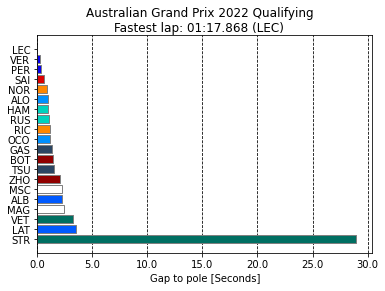

In [147]:
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],color= team_colors, edgecolor = 'grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
plt.xlabel("Gap to pole [Seconds]")
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)
a = np.array(ax.get_xticks().tolist())/1000000000
ax.set_xticklabels(a)
lap_time_string = strftimedelta(pole['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.event['EventName']} {session.event.year} Qualifying\n" 
             f"Fastest lap: {lap_time_string} ({pole['Driver']})");

